## Г. Оюуномин B221910802

NetworkX бол Python хэл дэх олон төрлийн сүлжээний бүтцийг үүсгэх,
засварлах, судлах боломжийг олгодог сан юм. Энэ нь нийгмийн, биологийн
болон дэд бүтцийн сүлжээг шинжлэх хэрэгслүүдийг хангахын зэрэгцээ том
хэмжээний өгөгдөлтэй хялбар ажиллах боломжийг олгодог.

In [ ]:
!pip install networkx

Сангуудыг импортлох буюу дуудах шаардлагатай. Үүнд warnings, counter, numpy сангууд орно. Анхааруулга модулийг анхааруулах мессежийг удирдахад ашигладаг бол collections модулийн Counter нь жагсаалт дахь элементүүдийн тохиолдлыг тоолоход тусалдаг. numpy (np нэрээр импортлогдсон) нь тоон үйлдлүүд болон массивтай харьцах хүчирхэг номын сан бөгөөд warnings.filterwarnings(ignore) нь аливаа анхааруулгын мессежийг харуулах боломжийг олгодог.

In [ ]:
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

## Chapter 9: Network Dynamics

### DyNetX: a library for dynamic network modeling
Бид өнгөрсөн хичээлүүд дээр статик сүлжээний топологийг судалсан. Г эхдээ бодит
амьдрал дээр сүлжээнд оролцогчид үүсэж, зарим тохиолдолд алга болж, заримдаа
холбогдох буюу харилцаа үүсгэж, зарим тохиолдолд харилцан хамаарал нь үгүй болж
байдаг. Өөрөөр хэлбэл цаг хугацаа өнгөрөхөд зангилаа болон холбоосууд нэмэгдэж, зарим
тохиолдолд устдаг. Энэ нь сүлжээний бүтэц болон холбоост байдалд ихээр нөлөөлдөг.
Тухайлбал, топологийн өөрчлөлт нь тархах үзэгдэлд ашиглагдана.
DyNetx нь цаг хугацаанаас хамаарч хувьсан өөрчлөгддөг графуудыг загварлахад
ашиглагддаг. Дараах хэсэгт бид DyNetx санг ашиглан динамик сүлжээнүүдийг байгуулах
болон түүн дээр шинжилгээ хийхэд шаардлагатай чухал ойлголтуудыг тайлбарлана.
Динамик сүлжээ нь таймстамп буюу цагийн үечлэлүүдэд ирмэг, оройнууд холбогдон үүсэх
топологи юм. Жишээг дараах зурагнаас харна уу.

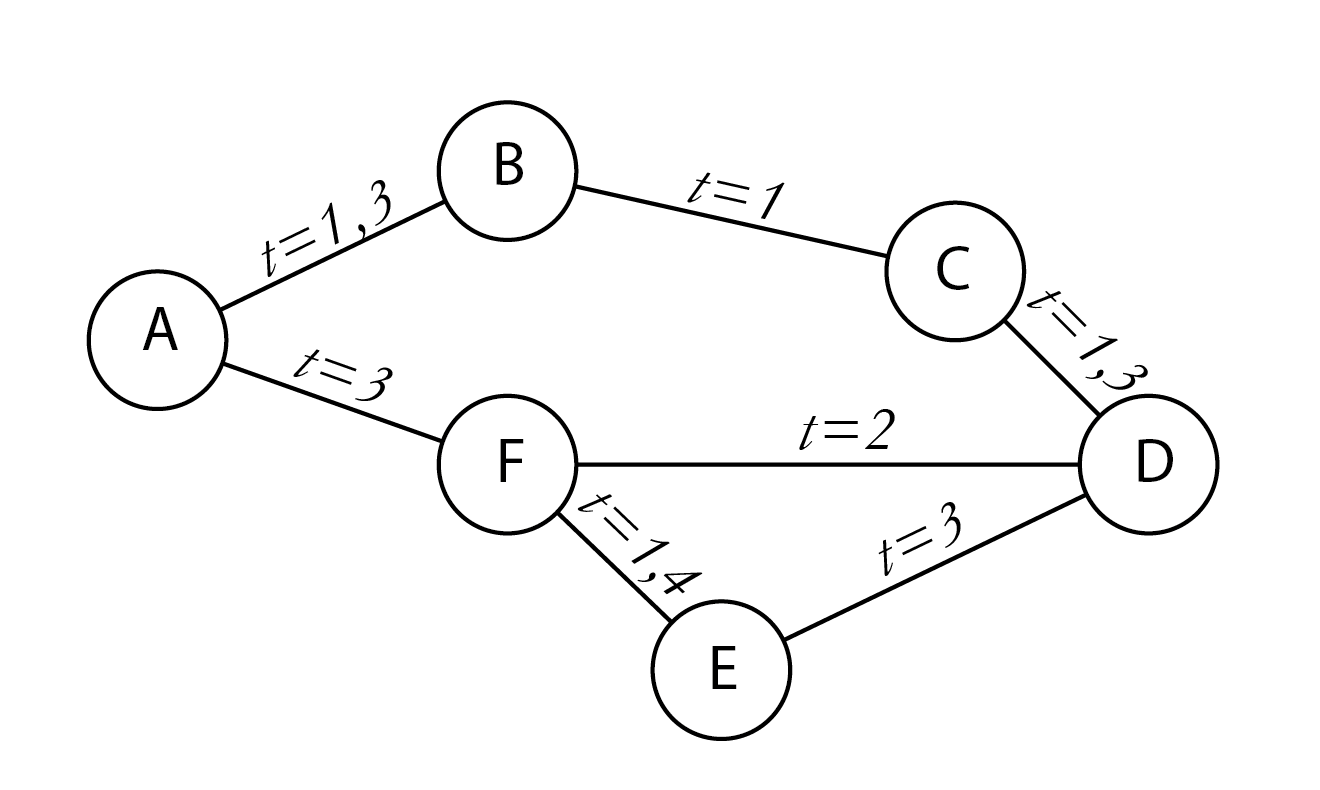

Энэхүү хэсэсгт CSV файлуудаас Game of Thrones киноны 6-р улирал дахь дүрүүд хоорондын харилцааны өгөгдлийг уншиж, NetworkX ашиглан сүлжээ (график) байгуулж байна.

In [ ]:
from google.colab import drive  # Google Drive руу хандах сан

# Google Drive хандаж өгөгдөл авахад бэлтгэх
drive.mount('/content/drive')

def read_net(filename):
    g = nx.Graph()  # Хоосон граф үүсгэх
    with open(filename) as f:
        f.readline()  # Толгой болох эхний мөрийг алгасах
        # Мөр бүрийн хувьд давталт гүйлгэн
        for l in f:
            l = l.split(",")  # Таслалаар хязгаарлан өгөгдлийн утгуудыг унших
            g.add_edge(l[0], l[1], weight=int(l[2])) # 2 оройг холбосон ирмэгийг нэмэх
    return g  # Үүсгэсэн графаа буцаах

# Дүн шинжилгээ хийх гэж буй Game of Thrones бүлгийг тодорхойлж өгнө
season = 6

# Өмнө тодорхойлсон функцээ ашиглан файлаас графаа үүсгэнэ
g = read_net(f'/content/drive/My Drive/asioaf/got-s{season}-edges.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bridges and Local Bridges
**Bridge** is an edge that connects two subgraphs. Simply, by removing the edge that was the sole connection between two components you will be left with two connected components. \
**Local Bridge** refers to the bridge, but it differs by the span. The only difference is that those two components are not completely separated, but, still they will be left with a huge span between them by deleting the local bridge edge.

In [ ]:
nx.has_bridges(g)

True

We've checked if there's any bridge in our graph/network between Game of Thrones' season 6 characters and found that there's a bridge existing in our graph. Therefore, in the code below, we will print all bridge edges by the node that it's connecting.

In [ ]:
list(nx.bridges(g))

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

Since we checked all bridges, we will print all local bridges in the graph now with the span which is the shortest path length between the endpoints if that local bridge is removed.

In [ ]:
list(nx.local_bridges(g, with_span=True))

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

## Tie Strength
Measuring Tie Strength for each pair of nodes in the graph through Neighborhood Overlap

Tie strength гэдэг нь нийгмийн сүлжээн дэх хүмүүсийн хоорондын харилцааны ойр байдал, давтамжийг илэрхийлдэг. Хүчтэй харилцаа холбоо (дотны найз нөхөд, гэр бүл гэх мэт) нь байнгын харилцаа холбоо, гүн гүнзгий сэтгэл хөдлөлийг агуулдаг бол сул холбоо (танил гэх мэт) шинэ мэдээлэл, боломжуудыг олж авах боломжийг олгодог.

Дараах функц нь график дахь ирмэг бүрийн хөрш давхцлыг тооцоолж, утгыг ирмэгийн шинж чанар болгон хадгалдаг. Хөршүүдийн давхцал нь нийт хөршүүдтэйгээ харьцуулахад хоёр зангилаа хэдэн нийтлэг хөршийг хуваалцаж байгааг хэмждэг.

In [ ]:
def node_overlap(g):
    for u, v in g.edges():  # Графын ирмэг бүрээр давтах
        n_u = set(g.neighbors(u))  # u оройн хөршүүдийн багцыг авах
        n_v = set(g.neighbors(v))  # v оройн хөршүүдийн багцыг авах
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Хөршүүдийн давхцалыг тооцоолох
        g[u][v]['overlap'] = overlap  # Давхцлын тооцооллын үр дүнг ирмэгт хадгалах
    return g  # Шинэчлэгдсэн графаа буцаах

Ажиллуулж үзье.

In [ ]:
g = node_overlap(g)

Plotting the KDE (Kernel Density Estimation) of Neighborhood Overlap

Энэхүү хэсэгт графикийн ирмэгээс ойр орчмын давхцлын утгыг гаргаж, цөмийн нягтын тооцоо (KDE) график ашиглан тэдгээрийн тархалтыг дүрслэн харуулж байна.

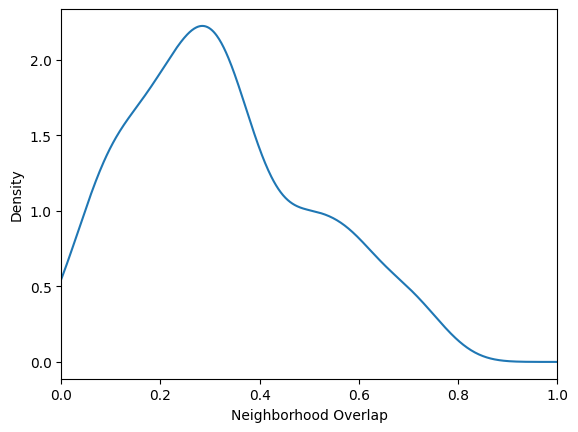

In [ ]:
# Графикийн ирмэг бүрээс "давхцах" утгыг гаргаж жагсаалтад хадгална.
weights = [e[-1]['overlap'] for e in g.edges(data=True)]

# Жагсаалтыг Pandas DataFrame болгон хувиргаж, давхардлын утгуудын KDE (гөлгөр нягтрал) графикийг зурна.
pd.DataFrame(weights)[0].plot.kde()

plt.xlabel("Neighborhood Overlap")
# х утгад хязгаар зааж өгөх
plt.xlim(0,1)
plt.show()

Plotting the KDE (Kernel Density Estimation) of Interactions Weights

Хөршүүдийн давхцлын KDE нь холбогдсон хос зангилаа нийтлэг хөршүүдээ хэр олон удаа хуваалцаж байгааг харуулдаг нь сүлжээн дэх холболтуудын бүтцийн ижил төстэй байдлыг илтгэнэ. Үүний эсрэгээр, харилцан үйлчлэлийн жингийн KDE нь (харилцаа холбооны давтамж эсвэл гүйлгээний хүчд суурилсан ирмэгийн жин гэх мэт) нь холбогдсон зангилаа хоорондын харилцан үйлчлэлийн эрчмийн хуваарилалтыг илэрхийлдэг. Хөршүүдийн давхцал нь хуваалцсан сүлжээний бүтцэд төвлөрдөг бол харилцан үйлчлэлийн жин нь шууд харилцан үйлчлэлийн хүч эсвэл давтамжийг тодорхойлдог.



In [ ]:
print(g.edges)

[('JON', 'SANSA'), ('JON', 'DAVOS'), ('JON', 'MELISANDRE'), ('JON', 'TORMUND'), ('JON', 'EDDISON_TOLLETT'), ('JON', 'RAMSAY'), ('JON', 'LYANNA_MORMONT'), ('JON', 'ROBETT'), ('JON', 'ALLISER_THORNE'), ('JON', 'WUN_WUN'), ('JON', 'BRIENNE'), ('JON', 'NED'), ('JON', 'RICKON'), ('JON', 'LITTLEFINGER'), ('JON', 'SMALLJON'), ('JON', 'GLOVER'), ('JON', 'BOWEN_MARSH'), ('JON', 'OLLY'), ('JON', 'DIM_DALBA'), ('JON', 'MAESTER_MORMONT'), ('JON', 'ROBB'), ('JON', 'MANDERLY'), ('JON', 'PODRICK'), ('JON', 'SAM'), ('JON', 'STANNIS'), ('JON', 'BRAN'), ('JON', 'HARALD'), ('JON', 'JEOR'), ('JON', 'OTHELL_YARWYCK'), ('JON', 'ROOSE_BOLTON'), ('JON', 'THEON'), ('SANSA', 'LITTLEFINGER'), ('SANSA', 'BRIENNE'), ('SANSA', 'DAVOS'), ('SANSA', 'RAMSAY'), ('SANSA', 'THEON'), ('SANSA', 'TORMUND'), ('SANSA', 'PODRICK'), ('SANSA', 'LYANNA_MORMONT'), ('SANSA', 'NED'), ('SANSA', 'EDDISON_TOLLETT'), ('SANSA', 'MELISANDRE'), ('SANSA', 'RICKON'), ('SANSA', 'ROBETT'), ('SANSA', 'ROOSE_BOLTON'), ('SANSA', 'ARYA'), ('SANSA'

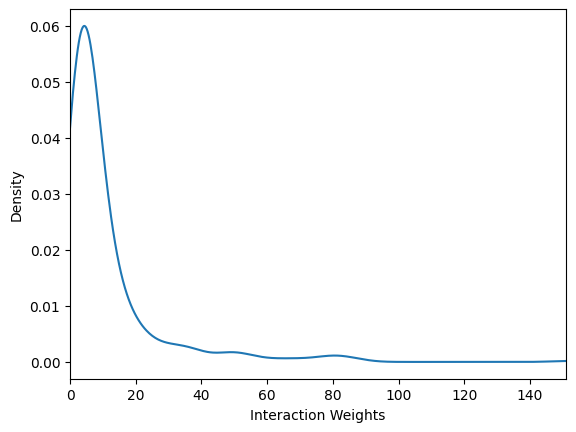

In [ ]:
# Графикийн ирмэг бүрээс "жин" шинж чанарыг гаргаж аваад жагсаалтад хадгална.
weights_got = [d['weight'] for u,v,d in g.edges(data=True)]

# Графикийн ирмэг бүрээс "жин" шинж чанарыг гаргаж аваад жагсаалтад хадгална.
pd.DataFrame(weights_got)[0].plot.kde()
plt.xlabel("Interaction Weights")

# X тэнхлэгийн хязгаарыг 0-ээс хамгийн их харилцан үйлчлэлийн жин хүртэл тохируулна.
plt.xlim(0, max(weights_got))
plt.show()


### Network Resilience

Сүлжээний уян хатан байдал нь сүлжээний зарим зангилаа эсвэл холболт амжилтгүй болсон ч үргэлжлүүлэн ажиллах чадвар юм. Өндөр уян хатан сүлжээ нь тасалдлыг үл харгалзан холболт болон гүйцэтгэлийг хадгалж чаддаг бол уян хатан чанар муутай сүлжээ нь хурдан задарч болно.

In the following we:


*   generate Random and Scale-free Network
*   compute Reslience for both Networks (through molloy_reed and breakdown_threshold)
*   plot Game of Thrones graph Resilience under Random Failure and Targeted Attacks

Generating Networks

Энэ код нь NetworkX ашиглан хоёр өөр төрлийн санамсаргүй график үүсгэдэг: Erdős–Rényi (ER) санамсаргүй график болон Барабаси–Альберт (BA) масштабгүй сүлжээ.

In [ ]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)
# Creates an Erdős–Rényi random graph with 1000 nodes,
# where each possible edge is added with a probability of 0.001.

# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)
# Creates a Barabási–Albert scale-free network with 1000 nodes,
# where each new node connects to 2 existing nodes, following a preferential attachment rule.


ER болон BA сүлжээнүүдийн аль алинд нь тооцоолох зангилааны зэрэг

In [ ]:
# 1. Erdős–Rényi (ER) графын бүх зангилаануудын зэрэг (degree)-ийн утгыг жагсаалт (list) хэлбэрээр хадгалах
er_degs = list(dict(er.degree()).values())
# 2. Barabási–Albert (BA) графын бүх зангилаануудын зэрэг (degree)-ийн утгыг жагсаалт (list) хэлбэрээр хадгалах
ba_degs = list(dict(ba.degree()).values())

**Molloy-Reed threshold** нь сүлжээнд аварга том холбогдсон бүрэлдэхүүн хэсэг (том, сайн холбогдсон зангилааны кластер) байх эсэхийг урьдчилан таамаглах дүрэм юм. Хэрэв дундаж квадрат хэм нь дундаж хэмээс хоёр дахин хасагдсан бол тэгээс их байвал сүлжээ нь холбогдсон хэвээр байх магадлалтай; эс бөгөөс энэ нь салангид жижиг хэсгүүдэд хуваагдах хандлагатай байдаг.

In [ ]:
def molloy_reed(degrees):
    # Сүлжээний холболтын хувьд аварга холбогдсон бүрэлдэхүүн хэсгийн магадлалыг тооцоолох дундаж зэрэг ашиглан Molloy-Reed-ийн босгыг тооцдог.
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

def breakdown_threshold(degrees):
    # 'molloy_reed' функцийг ашиглан Molloy-Reed-ийн босгыг тооцоолно.
    K = molloy_reed(degrees)

    # Моллой-Ридийн босго дээр үндэслэн эвдрэлийн босгыг тооцоолж, сүлжээний хуваагдал эхлэх цэгийг заана.
    return 1 - (1/(K-1))


### Random network

Эрдос-Рени графикийн Моллой-Ридийн босгыг түүний зэрэглэлийн тархалтад үндэслэн тооцож, аварга холбогдсон бүрэлдэхүүн хэсэг оршин тогтнох эсэхийг таамагладая.

In [ ]:
molloy_reed(er_degs)

np.float64(1.9140000000000001)

Molloy-Reed-ийн босго томьёог ашиглан Эрдос-Рени графикийн салангид хэсгүүдэд хуваагдах цэгийг тооцох нь.

In [ ]:
breakdown_threshold(er_degs)

np.float64(-0.09409190371991238)

### Scale-free network

Өмнөхтэй ижил үйлдлийг гүйцэтгэнэ.

In [ ]:
molloy_reed(ba_degs)

np.float64(4.992)

In [ ]:
breakdown_threshold(ba_degs)

np.float64(0.7494989979959921)

### Random failures

Сүлжээний зангилаа, холболтыг санамсаргүй байдлаар устгасан эсвэл ямар нэгэн тодорхой загвар, шалтгаангүйгээр эвдэрсэн үед санамсаргүй алдаа гардаг. Эдгээр доголдол нь сүлжээний бүтцийг эвдэж, сүлжээний уян хатан чанараас хамааран салгагдсан жижиг хэсгүүдэд хуваагдахад хүргэдэг.

Энэхүү код нь сүлжээн дэх хамгийн том холбогдсон бүрэлдэхүүн хэсгийн хэмжээг хянахын зэрэгцээ тодорхой онооны үндсэн дээр санамсаргүй байдлаар сүлжээг задлах үйл явцыг дуурайх функцуудыг тодорхойлдог.

In [ ]:
def random_node(g):
    # Selects and returns a random node from the graph g.
    return [np.random.choice(g.nodes())]

def dismantle(g, function, **args):
    # Iteratively removes nodes from the graph g and tracks the size of the largest connected component.
    total_nodes = g.number_of_nodes()  # Get total number of nodes in the graph
    removed_nodes = []  # List to track the proportion of removed nodes
    components = []  # List to track the size of the largest connected component

    while len(g.nodes()) > 1:  # Continue until only one or fewer nodes remain
        n = function(g, **args)[0]  # Call the given function to select a node to remove
        g.remove_node(n)  # Remove the selected node from the graph
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)  # Track the proportion of nodes removed
        comps = list(nx.connected_components(g))  # Get the connected components of the graph
        g_size = 0
        if len(comps) > 0:
            g_size = max([len(c) for c in comps]) / total_nodes  # Track the size of the largest component
        components.append(g_size)  # Append the current size of the largest component

    return removed_nodes, components  # Return lists of removed node proportions and component sizes

def get_sorted_nodes(g, score, reverse=True):
    # Sorts nodes based on a score function (e.g., degree, centrality) in descending or ascending order.
    nodes = score(g)  # Get the score of nodes from the given function
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]  # Convert dictionary to a list of tuples
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  # Sort nodes based on score
    return [x[0] for x in srt]  # Return the sorted list of node identifiers

def plot_dismantle(x, y):
    # Plots the proportion of removed nodes against the size of the largest connected component.
    plt.plot(x, y)  # Plot the data
    plt.xlabel("Removed Nodes")  # Label the x-axis
    plt.ylabel("Giant Component size")  # Label the y-axis
    plt.show()  # Display the plot


Giant component size has a consistent decrease when a big fraction of nodes is removed

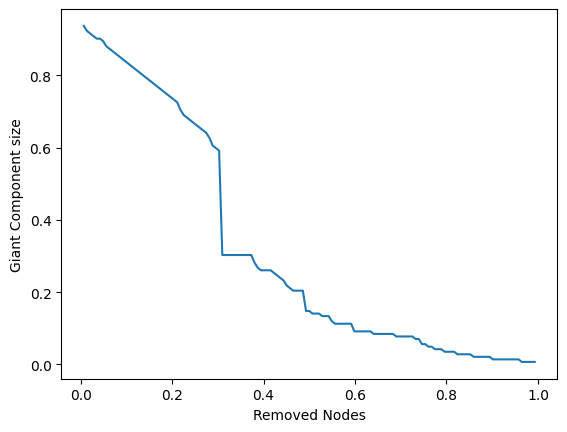

In [ ]:
h = g.copy()
rn, comps = dismantle(h, random_node)
plot_dismantle(rn, comps)

### Targeted Attacks
Targeted Node attack (hubs are removed first)

**Targeted Attacks** гэдэг нь сүлжээн дэх тодорхой зангилаа эсвэл ирмэгийг тэдгээрийн ач холбогдол, төвлөрсөн байдалд тулгуурлан стратегийн хувьд устгахыг хэлнэ, тухайлбал өндөр зэрэгтэй эсвэл өндөр хоорондын төвлөрсөн цэгүүд. Санамсаргүй бүтэлгүйтлээс ялгаатай нь зорилтот халдлага нь сүлжээн дэх холболт эсвэл урсгалыг хадгалахад чухал ач холбогдолтой гол зангилаануудыг чиглүүлэх замаар сүлжээг сулруулахад чиглэгддэг.

Giant component size has a consistent decrease when a small fraction of nodes is removed

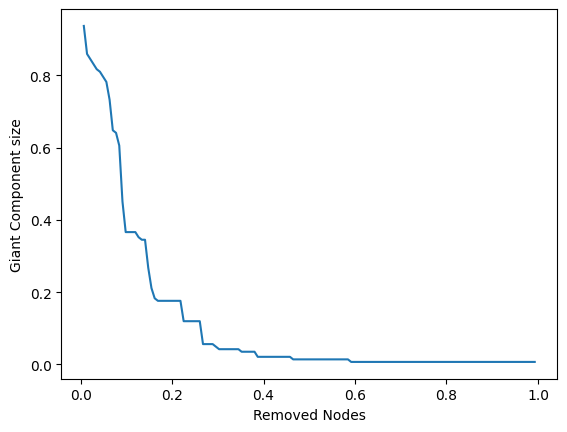

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

Targeted Edge Attack (based on Edge Betweenness Centrality)

Giant component size has a consistent decrease when a small fraction of nodes is removed

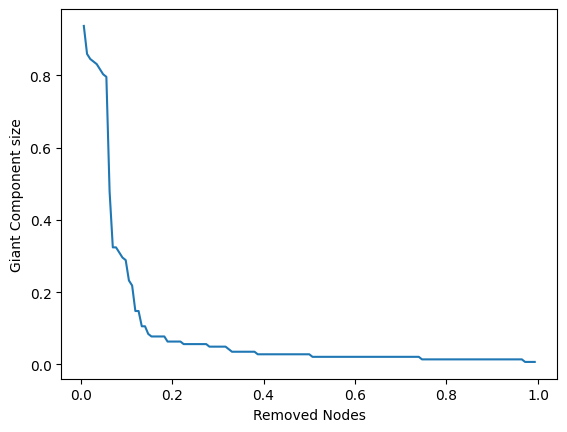

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(rn, comps)

Targeted Edge Attack (based on Edge Harmonic Centrality)

Giant component size has a consistent decrease when a small fraction of nodes is removed

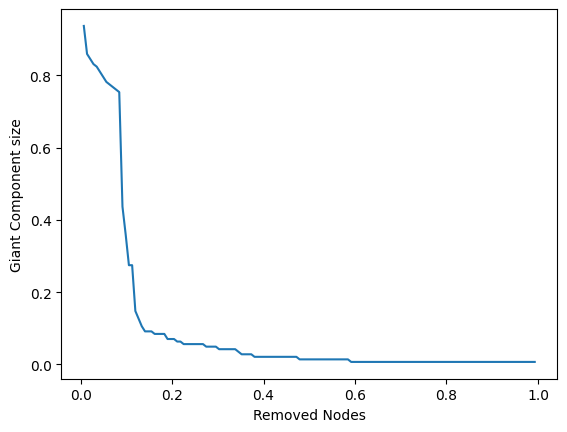

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)
plot_dismantle(rn, comps)